In [58]:
import lsst.afw.image as afwImage
from lsst.afw.table import BaseCatalog
import glob
import sqlite3
import pandas as pd
import data_process_utils as dpu
import matplotlib.pyplot as plt

from astropy.visualization import ZScaleInterval
interval = ZScaleInterval()

In [59]:
!pwd

/pscratch/sd/s/shl159/projects/update_plots/dia_improvement/devel


In [6]:
# ! cp '/pscratch/sd/s/shl159/Cori/projects/fake_injection_v23/dia_improvement/devel/data/patch_0to6/diff/al_default_v23/detection/detection.sqlite' './default_detection.sqlite'

In [60]:
SAT_FLAGS = ['base_PixelFlags_flag_saturated', 'base_PixelFlags_flag_saturatedCenter', 'base_PixelFlags_flag_suspect',
              'base_PixelFlags_flag_suspectCenter', 'base_PixelFlags_flag_offimage', 'base_PixelFlags_flag_edge',
              'base_PixelFlags_flag_bad']

#### Postage Stamps vs. Spatial Degree of Freedom

In [61]:
spatial1_diaSrc = BaseCatalog.readFits(
    '/pscratch/sd/s/shl159/Cori/projects/fake_injection_v23/dia_improvement/devel/data/patch_0to6/diff'
    '/al_spatial1_v23/00_20_21_1013665_79_i/diff_20/deepDiff/v01013665-fi/R20/diaSrc_01013665-i-R20-S21-det079.fits')
spatial1_diaSrc = spatial1_diaSrc.asAstropy()

spatial_diff_ls = []
for s in range(1, 5):
    spatial_diff = afwImage.ExposureF('/pscratch/sd/s/shl159/Cori/projects/fake_injection_v23/dia_improvement/devel/data/patch_0to6/diff'
                                      f'/al_spatial{s}_v23/00_20_21_1013665_79_i/diff_20/deepDiff/v01013665-fi/R20/diffexp_01013665-i-R20-S21-det079.fits')
    spatial_diff_ls.append(spatial_diff)

In [62]:
diaSrc_nonsat = dpu.remove_flag_astropy(spatial1_diaSrc, flag_list=SAT_FLAGS)

In [65]:
def display_spatial_stamps(source_table, spatial_diff_ls):
    fig, ax = plt.subplots(4, 5, figsize=(7,5.6))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for s in range(4):
        spatial_diff = spatial_diff_ls[s]
        for i in range(5):
            row = source_table[i]
            x = row['base_NaiveCentroid_x']
            y = row['base_NaiveCentroid_y']
            spatial_stamp = dpu.make_cutout(spatial_diff, x, y, cutout_size=30)
            ax[s][i].imshow(interval(spatial_stamp.getImage().array), cmap='gray', origin='lower')
            if i == 0:
                ax[s][i].set_ylabel(f'$d_s={s+1}$', size=16)
            for r in range(4):
                ax[r][i].set_xticks([])
                ax[r][i].set_yticks([])

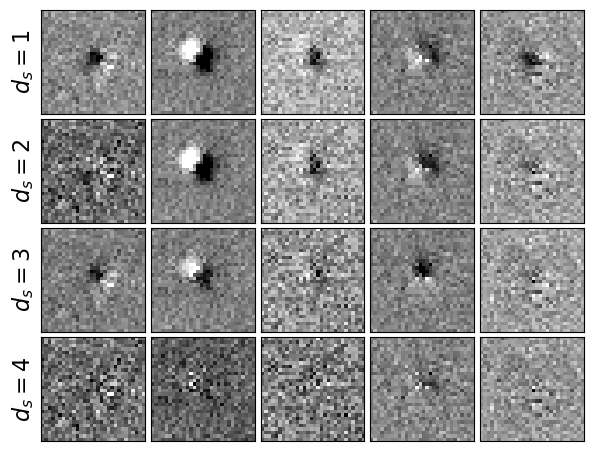

In [66]:
display_spatial_stamps(diaSrc_nonsat[[0,5,8,14, 25]], spatial_diff_ls)
plt.savefig('./plots_and_tables/spatial_stamps.pdf')